<a href="https://colab.research.google.com/github/Farhanahoque251/Drug-Discovery-with-Python/blob/main/TRPV1_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Computational Drug Discovery [Part 1] :**TRPV1**

---



In [1]:
! pip install chembl_webresource_client

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.2/69.2 kB 4.7 MB/s eta 0:00:00


In [2]:
# Import necessary libraries
import pandas as pd
from chembl_webresource_client.new_client import new_client

In [3]:
# Target search for mGluR5
target = new_client.target
target_query = target.search('TRPV1')
targets = pd.DataFrame.from_dict(target_query)
targets


,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Homo sapiens,Vanilloid receptor,17.0,False,CHEMBL4794,"[{'accession': 'Q8NER1', 'component_descriptio...",SINGLE PROTEIN,9606
1,[],Cavia porcellus,Vanilloid receptor 1,17.0,False,CHEMBL5132,"[{'accession': 'Q6R5A3', 'component_descriptio...",SINGLE PROTEIN,10141
2,[],Canis lupus familiaris,Vanilloid receptor 1,17.0,False,CHEMBL5254,"[{'accession': 'Q697L1', 'component_descriptio...",SINGLE PROTEIN,9615
3,[],Mus musculus,Transient receptor potential cation channel su...,17.0,False,CHEMBL1781864,"[{'accession': 'Q704Y3', 'component_descriptio...",SINGLE PROTEIN,10090
4,[],Rattus norvegicus,Vanilloid receptor,16.0,False,CHEMBL5102,"[{'accession': 'O35433', 'component_descriptio...",SINGLE PROTEIN,10116
5,[],Gallus gallus,Uncharacterized protein,13.0,False,CHEMBL2412949,"[{'accession': 'F1NJH8', 'component_descriptio...",SINGLE PROTEIN,9031
6,[],Rattus norvegicus,Vanilloid receptor,10.0,False,CHEMBL2096684,"[{'accession': 'Q9ERZ8', 'component_descriptio...",PROTEIN FAMILY,10116


In [4]:
selected_target = targets.target_chembl_id[0]
selected_target

'CHEMBL4794'

In [7]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [6]:
df = pd.DataFrame.from_dict(res)

In [8]:
df.head()

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,632519,[],CHEMBL820091,Antagonistic activity towards human vanilloid ...,F,None,None,BAO_0000190,...,Homo sapiens,Vanilloid receptor,9606,None,None,IC50,nM,UO_0000065,None,6.0
1,None,None,632521,[],CHEMBL820091,Antagonistic activity towards human vanilloid ...,F,None,None,BAO_0000190,...,Homo sapiens,Vanilloid receptor,9606,None,None,IC50,nM,UO_0000065,None,13.0
2,None,None,633813,[],CHEMBL820091,Antagonistic activity towards human vanilloid ...,F,None,None,BAO_0000190,...,Homo sapiens,Vanilloid receptor,9606,None,None,IC50,nM,UO_0000065,None,10.0
3,None,None,637294,[],CHEMBL820091,Antagonistic activity towards human vanilloid ...,F,None,None,BAO_0000190,...,Homo sapiens,Vanilloid receptor,9606,None,None,IC50,nM,UO_0000065,None,6.0
4,None,None,639749,[],CHEMBL820091,Antagonistic activity towards human vanilloid ...,F,None,None,BAO_0000190,...,Homo sapiens,Vanilloid receptor,9606,None,None,IC50,nM,UO_0000065,None,32.0


In [9]:
df.shape

(3943, 46)

In [10]:
df2 = df[df.standard_value.notna()]
df2 = df2[df.canonical_smiles.notna()]
df2

<ipython-input-10-955aac5800f0>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df2[df.canonical_smiles.notna()]


,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,632519,[],CHEMBL820091,Antagonistic activity towards human vanilloid ...,F,None,None,BAO_0000190,...,Homo sapiens,Vanilloid receptor,9606,None,None,IC50,nM,UO_0000065,None,6.0
1,None,None,632521,[],CHEMBL820091,Antagonistic activity towards human vanilloid ...,F,None,None,BAO_0000190,...,Homo sapiens,Vanilloid receptor,9606,None,None,IC50,nM,UO_0000065,None,13.0
2,None,None,633813,[],CHEMBL820091,Antagonistic activity towards human vanilloid ...,F,None,None,BAO_0000190,...,Homo sapiens,Vanilloid receptor,9606,None,None,IC50,nM,UO_0000065,None,10.0
3,None,None,637294,[],CHEMBL820091,Antagonistic activity towards human vanilloid ...,F,None,None,BAO_0000190,...,Homo sapiens,Vanilloid receptor,9606,None,None,IC50,nM,UO_0000065,None,6.0
4,None,None,639749,[],CHEMBL820091,Antagonistic activity towards human vanilloid ...,F,None,None,BAO_0000190,...,Homo sapiens,Vanilloid receptor,9606,None,None,IC50,nM,UO_0000065,None,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3938,"{'action_type': 'ANTAGONIST', 'description': '...",None,25706580,[],CHEMBL5386897,Antagonist activity at human recombinant TPRV1,B,None,None,BAO_0000190,...,Homo sapiens,Vanilloid receptor,9606,None,None,IC50,nM,UO_0000065,None,236.0
3939,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25706581,[],CHEMBL5386898,Inhibition of human recombinant TRPV1,B,None,None,BAO_0000190,...,Homo sapiens,Vanilloid receptor,9606,None,None,IC50,nM,UO_0000065,None,50.0
3940,"{'action_type': 'ANTAGONIST', 'description': '...",None,25706582,[],CHEMBL5386899,Antagonist activity at human TRPV1 expressed i...,B,None,None,BAO_0000190,...,Homo sapiens,Vanilloid receptor,9606,None,None,IC50,nM,UO_0000065,None,35.1
3941,"{'action_type': 'ANTAGONIST', 'description': '...",None,25706583,[],CHEMBL5386900,Antagonist activity at human recombinant TRPV1...,B,None,None,BAO_0000190,...,Homo sapiens,Vanilloid receptor,9606,None,None,IC50,nM,UO_0000065,None,4.0


In [11]:

len(df2.canonical_smiles.unique())

3211

In [12]:
df2_nr = df2.drop_duplicates(['canonical_smiles'])
df2_nr

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,632519,[],CHEMBL820091,Antagonistic activity towards human vanilloid ...,F,None,None,BAO_0000190,...,Homo sapiens,Vanilloid receptor,9606,None,None,IC50,nM,UO_0000065,None,6.0
1,None,None,632521,[],CHEMBL820091,Antagonistic activity towards human vanilloid ...,F,None,None,BAO_0000190,...,Homo sapiens,Vanilloid receptor,9606,None,None,IC50,nM,UO_0000065,None,13.0
2,None,None,633813,[],CHEMBL820091,Antagonistic activity towards human vanilloid ...,F,None,None,BAO_0000190,...,Homo sapiens,Vanilloid receptor,9606,None,None,IC50,nM,UO_0000065,None,10.0
3,None,None,637294,[],CHEMBL820091,Antagonistic activity towards human vanilloid ...,F,None,None,BAO_0000190,...,Homo sapiens,Vanilloid receptor,9606,None,None,IC50,nM,UO_0000065,None,6.0
4,None,None,639749,[],CHEMBL820091,Antagonistic activity towards human vanilloid ...,F,None,None,BAO_0000190,...,Homo sapiens,Vanilloid receptor,9606,None,None,IC50,nM,UO_0000065,None,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3934,"{'action_type': 'ACTIVATOR', 'description': 'P...",None,25706564,[],CHEMBL5386892,Activation of human TRPV1 expressed in HEK293F...,B,None,None,BAO_0000190,...,Homo sapiens,Vanilloid receptor,9606,None,None,IC50,uM,UO_0000065,None,0.084
3937,"{'action_type': 'ANTAGONIST', 'description': '...",None,25706579,[],CHEMBL5386897,Antagonist activity at human recombinant TPRV1,B,None,None,BAO_0000190,...,Homo sapiens,Vanilloid receptor,9606,None,None,IC50,nM,UO_0000065,None,5.0
3938,"{'action_type': 'ANTAGONIST', 'description': '...",None,25706580,[],CHEMBL5386897,Antagonist activity at human recombinant TPRV1,B,None,None,BAO_0000190,...,Homo sapiens,Vanilloid receptor,9606,None,None,IC50,nM,UO_0000065,None,236.0
3939,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25706581,[],CHEMBL5386898,Inhibition of human recombinant TRPV1,B,None,None,BAO_0000190,...,Homo sapiens,Vanilloid receptor,9606,None,None,IC50,nM,UO_0000065,None,50.0


In [13]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2_nr[selection]
df3


,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL102010,O=C(NCc1ccc(Cl)cc1)Nc1cccc2cnccc12,6.0
1,CHEMBL104623,CCC(C)(C)c1ccc(CCC(=O)Nc2cccc3cnccc23)cc1,13.0
2,CHEMBL103590,O=C(NCCc1ccc(Cl)c(Cl)c1)Nc1cccc2cnccc12,10.0
3,CHEMBL102486,O=C(NCc1ccc(Cl)c(C(F)(F)F)c1)Nc1cccc2cnccc12,6.0
4,CHEMBL320906,O=C(Nc1cc(C(F)(F)F)cc(C(F)(F)F)c1)Nc1cccc2cnccc12,32.0
...,...,...,...
3934,CHEMBL5430171,O=C(Nc1cccc2cnccc12)N1CCC[C@H]1CNc1ccc(Br)cc1,84.0
3937,CHEMBL5398782,C[C@H](NC(=O)Cn1cnc2ccc(F)c(F)c21)c1ccc(C(C)(C...,5.0
3938,CHEMBL5314399,Cc1ccc(N2c3cccc(C(=O)Nc4ccc(OCC(F)(F)F)nc4)c3O...,236.0
3939,CHEMBL5398726,CCCc1nc(C(F)(F)F)ccc1/C=C/C(=O)N[C@H](C)c1cc(F...,50.0


**Labeling compounds as either being active, inactive or intermediate**
The bioactivity data is in the IC50 unit. Compounds having values of less than 1000 nM will be considered to be active while those greater than 10,000 nM will be considered to be inactive. As for those values in between 1,000 and 10,000 nM will be referred to as intermediate.

In [14]:
bioactivity_threshold = []
for i in df3.standard_value:
  if float(i) >= 10000:
    bioactivity_threshold.append("inactive")
  elif float(i) <= 1000:
    bioactivity_threshold.append("active")
  else:
    bioactivity_threshold.append("intermediate")

In [15]:
bioactivity_class = pd.Series(bioactivity_threshold, name='class')
df4 = pd.concat([df3, bioactivity_class], axis=1)
df4

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL102010,O=C(NCc1ccc(Cl)cc1)Nc1cccc2cnccc12,6.0,active
1,CHEMBL104623,CCC(C)(C)c1ccc(CCC(=O)Nc2cccc3cnccc23)cc1,13.0,active
2,CHEMBL103590,O=C(NCCc1ccc(Cl)c(Cl)c1)Nc1cccc2cnccc12,10.0,active
3,CHEMBL102486,O=C(NCc1ccc(Cl)c(C(F)(F)F)c1)Nc1cccc2cnccc12,6.0,active
4,CHEMBL320906,O=C(Nc1cc(C(F)(F)F)cc(C(F)(F)F)c1)Nc1cccc2cnccc12,32.0,active
...,...,...,...,...
3198,NaN,NaN,NaN,intermediate
3200,NaN,NaN,NaN,inactive
3202,NaN,NaN,NaN,intermediate
3203,NaN,NaN,NaN,active


**Part-2:Exploratory Data Analysis**

In [16]:
#Install conda and rdkit

! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2025-06-01 08:52:06--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.191.158, 104.16.32.241, 2606:4700::6810:20f1, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.191.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   252MB/s    in 0.3s    

2025-06-01 08:52:06 (252 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=

In [17]:
df4.head()

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL102010,O=C(NCc1ccc(Cl)cc1)Nc1cccc2cnccc12,6.0,active
1,CHEMBL104623,CCC(C)(C)c1ccc(CCC(=O)Nc2cccc3cnccc23)cc1,13.0,active
2,CHEMBL103590,O=C(NCCc1ccc(Cl)c(Cl)c1)Nc1cccc2cnccc12,10.0,active
3,CHEMBL102486,O=C(NCc1ccc(Cl)c(C(F)(F)F)c1)Nc1cccc2cnccc12,6.0,active
4,CHEMBL320906,O=C(Nc1cc(C(F)(F)F)cc(C(F)(F)F)c1)Nc1cccc2cnccc12,32.0,active


In [18]:
df_no_smiles = df4.drop(columns='canonical_smiles')

smiles = []
for i in df.canonical_smiles.tolist():
    cpd = str(i).split('.')
    cpd_longest = max(cpd, key=len)
    smiles.append(cpd_longest)

smiles = pd.Series(smiles, name='canonical_smiles', index=df.index)  # Keep index aligned with df

df_clean_smiles = pd.concat([df_no_smiles, smiles], axis=1)
df_clean_smiles.head()


,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL102010,6.0,active,O=C(NCc1ccc(Cl)cc1)Nc1cccc2cnccc12
1,CHEMBL104623,13.0,active,CCC(C)(C)c1ccc(CCC(=O)Nc2cccc3cnccc23)cc1
2,CHEMBL103590,10.0,active,O=C(NCCc1ccc(Cl)c(Cl)c1)Nc1cccc2cnccc12
3,CHEMBL102486,6.0,active,O=C(NCc1ccc(Cl)c(C(F)(F)F)c1)Nc1cccc2cnccc12
4,CHEMBL320906,32.0,active,O=C(Nc1cc(C(F)(F)F)cc(C(F)(F)F)c1)Nc1cccc2cnccc12


In [19]:
# Ensure canonical_smiles column is string
df_clean_smiles['canonical_smiles'] = df_clean_smiles['canonical_smiles'].astype(str)

# Filter valid SMILES, keep original index for alignment
valid_smiles = df_clean_smiles[
    df_clean_smiles['canonical_smiles'].notna() &
    df_clean_smiles['canonical_smiles'].str.strip().ne('') &
    ~df_clean_smiles['canonical_smiles'].str.lower().isin(['nan', 'none'])
]

valid_smiles.head()


,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL102010,6.0,active,O=C(NCc1ccc(Cl)cc1)Nc1cccc2cnccc12
1,CHEMBL104623,13.0,active,CCC(C)(C)c1ccc(CCC(=O)Nc2cccc3cnccc23)cc1
2,CHEMBL103590,10.0,active,O=C(NCCc1ccc(Cl)c(Cl)c1)Nc1cccc2cnccc12
3,CHEMBL102486,6.0,active,O=C(NCc1ccc(Cl)c(C(F)(F)F)c1)Nc1cccc2cnccc12
4,CHEMBL320906,32.0,active,O=C(Nc1cc(C(F)(F)F)cc(C(F)(F)F)c1)Nc1cccc2cnccc12


**Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the druglikeness of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the Rule-of-Five or Lipinski's Rule.

The Lipinski's Rule stated the following:

Molecular weight < 500 Dalton
Octanol-water partition coefficient (LogP) < 5
Hydrogen bond donors < 5
Hydrogen bond acceptors < 10

In [20]:
# Install RDKit via pip from a reliable source
!pip install rdkit-pypi


     |████████████████████████████████| 29.2 MB 58.8 MB/s 


In [22]:
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski
import numpy as np
import pandas as pd


In [23]:
#Calculate descriptors

# 1. Define lipinski function (your code snippet)
def lipinski(smiles, verbose=False):
    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData, columns=columnNames)

    return descriptors



In [24]:
df_lipinski = lipinski(valid_smiles['canonical_smiles'])
df_lipinski.head()


,MW,LogP,NumHDonors,NumHAcceptors
0,311.772,4.2099,2.0,2.0
1,346.474,5.4937,1.0,2.0
2,360.244,4.9058,2.0,2.0
3,379.769,5.2287,2.0,2.0
4,399.294,5.9164,2.0,2.0


In [25]:
# Reset indices before concatenation to avoid misalignment
valid_smiles = valid_smiles.reset_index(drop=True)
df_lipinski = df_lipinski.reset_index(drop=True)

# Combine original data with descriptors side-by-side
df_combined = pd.concat([valid_smiles, df_lipinski], axis=1)

# Check the combined dataframe
df_combined.head()


,molecule_chembl_id,standard_value,class,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL102010,6.0,active,O=C(NCc1ccc(Cl)cc1)Nc1cccc2cnccc12,311.772,4.2099,2.0,2.0
1,CHEMBL104623,13.0,active,CCC(C)(C)c1ccc(CCC(=O)Nc2cccc3cnccc23)cc1,346.474,5.4937,1.0,2.0
2,CHEMBL103590,10.0,active,O=C(NCCc1ccc(Cl)c(Cl)c1)Nc1cccc2cnccc12,360.244,4.9058,2.0,2.0
3,CHEMBL102486,6.0,active,O=C(NCc1ccc(Cl)c(C(F)(F)F)c1)Nc1cccc2cnccc12,379.769,5.2287,2.0,2.0
4,CHEMBL320906,32.0,active,O=C(Nc1cc(C(F)(F)F)cc(C(F)(F)F)c1)Nc1cccc2cnccc12,399.294,5.9164,2.0,2.0


In [26]:
# Summary statistics for Lipinski descriptors
df_combined[['MW', 'LogP', 'NumHDonors', 'NumHAcceptors']].describe()


,MW,LogP,NumHDonors,NumHAcceptors
count,3929.000000,3929.000000,3929.000000,3929.000000
mean,427.926744,4.622875,1.867905,4.284296
std,80.375004,1.160741,0.943738,1.821422
min,154.253000,-8.895300,0.000000,0.000000
25%,368.746000,3.863800,1.000000,3.000000
50%,422.569000,4.530800,2.000000,4.000000
75%,480.490000,5.335300,3.000000,6.000000
max,836.000000,11.597200,13.000000,19.000000


In [27]:
# Define rule violations
df_combined['violations'] = (
    (df_combined['MW'] > 500).astype(int) +
    (df_combined['LogP'] > 5).astype(int) +
    (df_combined['NumHDonors'] > 5).astype(int) +
    (df_combined['NumHAcceptors'] > 10).astype(int)
)

# Count how many compounds have 0, 1, 2, ... violations
df_combined['violations'].value_counts().sort_index()


,count
violations,
0,2263
1,1188
2,477
3,1


In [28]:
def list_violations(row):
    violations = []
    if row['MW'] > 500:
        violations.append('MW>500')
    if row['LogP'] > 5:
        violations.append('LogP>5')
    if row['NumHDonors'] > 5:
        violations.append('HDonors>5')
    if row['NumHAcceptors'] > 10:
        violations.append('HAcceptors>10')

    if not violations:
        return 'None'  # no violations
    else:
        return ', '.join(violations)

df_combined['violation_details'] = df_combined.apply(list_violations, axis=1)
df_combined[['MW', 'LogP', 'NumHDonors', 'NumHAcceptors', 'violations', 'violation_details']].head()


,MW,LogP,NumHDonors,NumHAcceptors,violations,violation_details
0,311.772,4.2099,2.0,2.0,0,None
1,346.474,5.4937,1.0,2.0,1,LogP>5
2,360.244,4.9058,2.0,2.0,0,None
3,379.769,5.2287,2.0,2.0,1,LogP>5
4,399.294,5.9164,2.0,2.0,1,LogP>5


**Convert IC50 to pIC50**
To allow IC50 data to be more uniformly distributed, we will convert IC50 to the negative logarithmic scale which is essentially -log10(IC50).

This custom function pIC50() will accept a DataFrame as input and will:

Take the IC50 values from the standard_value column and converts it from nM to M by multiplying the value by 10
Take the molar value and apply -log10
Delete the standard_value column and create a new pIC50 column

In [29]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)

    return x

In [30]:
df_combined.standard_value.describe()

,standard_value
count,3211
unique,1195
top,10000.0
freq,282


In [31]:
-np.log10( (10**-9)* 100000000 )

np.float64(1.0)

In [32]:
-np.log10( (10**-9)* 10000000000 )

np.float64(-1.0)

In [33]:
def norm_value(df):
    # Convert to numeric and coerce errors to NaN
    df['standard_value'] = pd.to_numeric(df['standard_value'], errors='coerce')

    # Cap the values at 100,000,000
    df['standard_value_norm'] = df['standard_value'].apply(lambda x: min(x, 100000000) if pd.notnull(x) else x)

    # Drop the original column
    df = df.drop(columns=['standard_value'])

    return df


In [34]:
df_norm = norm_value(df_combined)
df_norm.head()

,molecule_chembl_id,class,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors,violations,violation_details,standard_value_norm
0,CHEMBL102010,active,O=C(NCc1ccc(Cl)cc1)Nc1cccc2cnccc12,311.772,4.2099,2.0,2.0,0,None,6.0
1,CHEMBL104623,active,CCC(C)(C)c1ccc(CCC(=O)Nc2cccc3cnccc23)cc1,346.474,5.4937,1.0,2.0,1,LogP>5,13.0
2,CHEMBL103590,active,O=C(NCCc1ccc(Cl)c(Cl)c1)Nc1cccc2cnccc12,360.244,4.9058,2.0,2.0,0,None,10.0
3,CHEMBL102486,active,O=C(NCc1ccc(Cl)c(C(F)(F)F)c1)Nc1cccc2cnccc12,379.769,5.2287,2.0,2.0,1,LogP>5,6.0
4,CHEMBL320906,active,O=C(Nc1cc(C(F)(F)F)cc(C(F)(F)F)c1)Nc1cccc2cnccc12,399.294,5.9164,2.0,2.0,1,LogP>5,32.0


In [35]:
df_norm.standard_value_norm.describe()

,standard_value_norm
count,3.211000e+03
mean,6.167592e+03
std,4.152097e+04
min,1.100000e-01
25%,3.705000e+01
50%,1.840000e+02
75%,1.884900e+03
max,1.665000e+06


In [36]:
def pIC50(df):
    pIC50_values = []

    for val in df['standard_value_norm']:
        try:
            molar = val * (10**-9)  # Convert nM to Molar
            if molar > 0:
                pIC50_val = -np.log10(molar)
            else:
                pIC50_val = np.nan
        except:
            pIC50_val = np.nan
        pIC50_values.append(pIC50_val)

    df['pIC50'] = pIC50_values
    df = df.drop('standard_value_norm', axis=1)

    return df


In [37]:
df_final = pIC50(df_norm)
df_final.head()

,molecule_chembl_id,class,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors,violations,violation_details,pIC50
0,CHEMBL102010,active,O=C(NCc1ccc(Cl)cc1)Nc1cccc2cnccc12,311.772,4.2099,2.0,2.0,0,None,8.221849
1,CHEMBL104623,active,CCC(C)(C)c1ccc(CCC(=O)Nc2cccc3cnccc23)cc1,346.474,5.4937,1.0,2.0,1,LogP>5,7.886057
2,CHEMBL103590,active,O=C(NCCc1ccc(Cl)c(Cl)c1)Nc1cccc2cnccc12,360.244,4.9058,2.0,2.0,0,None,8.000000
3,CHEMBL102486,active,O=C(NCc1ccc(Cl)c(C(F)(F)F)c1)Nc1cccc2cnccc12,379.769,5.2287,2.0,2.0,1,LogP>5,8.221849
4,CHEMBL320906,active,O=C(Nc1cc(C(F)(F)F)cc(C(F)(F)F)c1)Nc1cccc2cnccc12,399.294,5.9164,2.0,2.0,1,LogP>5,7.494850


In [38]:
df_final.shape

(3929, 10)

In [39]:
df_final.pIC50.describe()

,pIC50
count,3211.000000
mean,6.588227
std,1.176942
min,2.778586
25%,5.724713
50%,6.735182
75%,7.431212
max,9.958607


In [40]:
print(df_final.columns.tolist())


['molecule_chembl_id', 'class', 'canonical_smiles', 'MW', 'LogP', 'NumHDonors', 'NumHAcceptors', 'violations', 'violation_details', 'pIC50']


In [41]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class.head(2)

,molecule_chembl_id,class,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors,violations,violation_details,pIC50
0,CHEMBL102010,active,O=C(NCc1ccc(Cl)cc1)Nc1cccc2cnccc12,311.772,4.2099,2.0,2.0,0,None,8.221849
1,CHEMBL104623,active,CCC(C)(C)c1ccc(CCC(=O)Nc2cccc3cnccc23)cc1,346.474,5.4937,1.0,2.0,1,LogP>5,7.886057


**Exploratory Data Analysis** (Chemical Space Analysis) via Lipinski descriptors
**Import library**

In [42]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

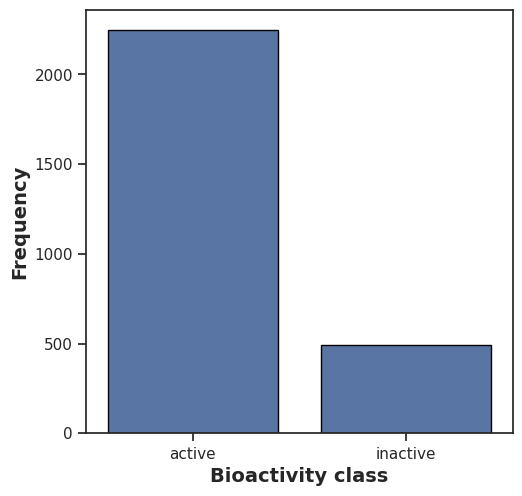

In [43]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

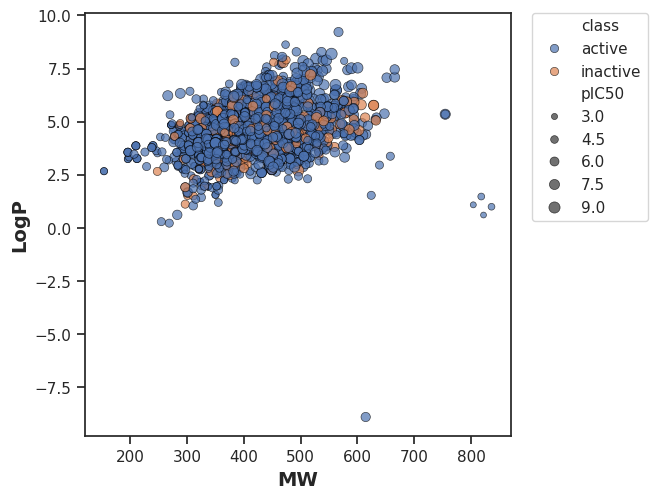

In [44]:
#Scatter plot of MW versus LogP
#It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

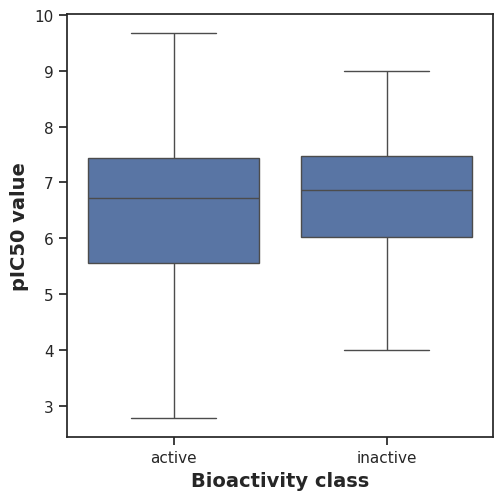

In [45]:
#Box plots
#pIC50 value

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')


In [46]:
#Statistical analysis | Mann-Whitney U Test
 # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/

import pandas as pd
from scipy.stats import mannwhitneyu

def mannwhitney(descriptor, verbose=False):
    # Select relevant columns
    selection = [descriptor, 'class']
    df = df_2class[selection]

    # Split into active and inactive groups
    active = df[df['class'] == 'active'][descriptor]
    inactive = df[df['class'] == 'inactive'][descriptor]

    # Perform Mann-Whitney U test
    stat, p = mannwhitneyu(active, inactive)

    # Interpret result
    alpha = 0.05
    if p > alpha:
        interpretation = 'Same distribution (fail to reject H0)'
    else:
        interpretation = 'Different distribution (reject H0)'

    # Create results DataFrame
    results = pd.DataFrame({
        'Descriptor': [descriptor],
        'Statistics': [stat],
        'p': [p],
        'alpha': [alpha],
        'Interpretation': [interpretation]
    })

    # Save result
    filename = f'mannwhitneyu_{descriptor}.csv'
    results.to_csv(filename, index=False)

    if verbose:
        print(results)

    return results



In [47]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,NaN,NaN,0.05,Different distribution (reject H0)


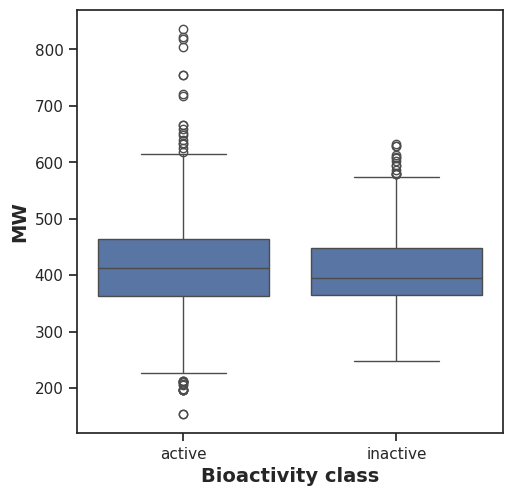

In [48]:
#MW

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [49]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,586854.0,0.026479,0.05,Different distribution (reject H0)


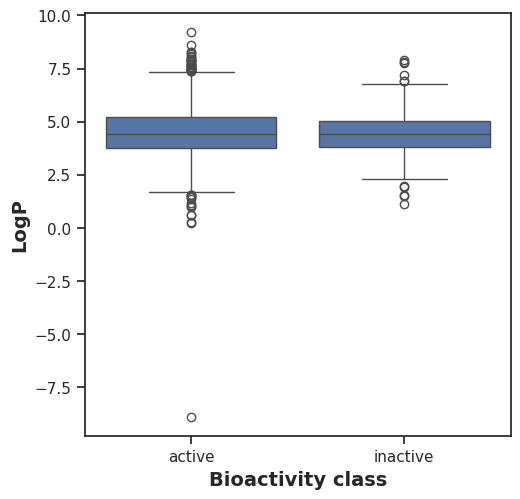

In [50]:
#LogP

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [51]:
#Statistical analysis | Mann-Whitney U Test


mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,563358.5,0.460199,0.05,Same distribution (fail to reject H0)


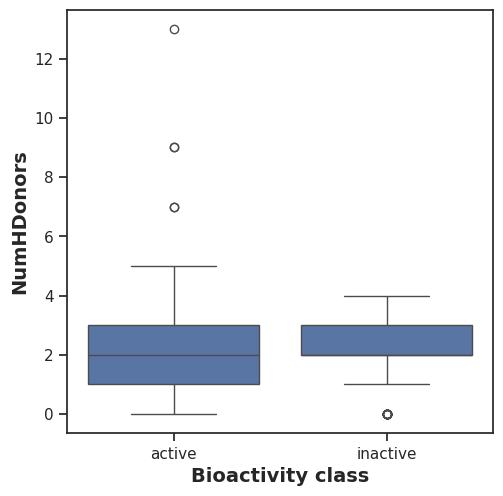

In [52]:
#NumHDonors

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [53]:
#Statistical analysis | Mann-Whitney U Test


mannwhitney('NumHDonors')


,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,452945.5,6.553633e-11,0.05,Different distribution (reject H0)


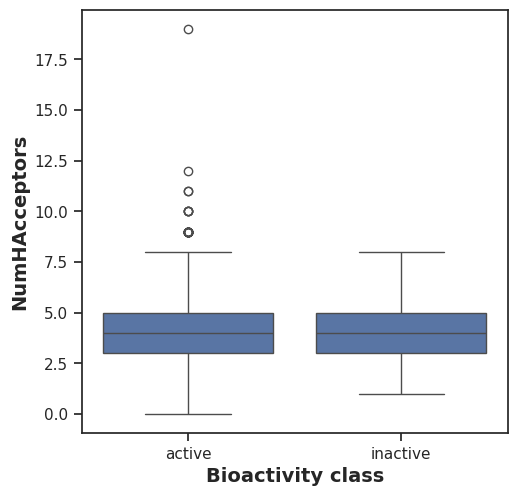

In [54]:
#NumHAcceptors

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')


In [55]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,576110.0,0.116065,0.05,Same distribution (fail to reject H0)


**Interpretation of Statistical Results**
Box Plots
pIC50 values
Taking a look at pIC50 values, the actives and inactives displayed statistically significant difference, which is to be expected since threshold values (IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives, corresponding to pIC50 > 6 = Actives and pIC50 < 5 = Inactives) were used to define actives and inactives.

Lipinski's descriptors
Of the 4 Lipinski's descriptors (MW, LogP, NumHDonors and NumHAcceptors), only LogP exhibited no difference between the actives and inactives while the other 3 descriptors (MW, NumHDonors and NumHAcceptors) shows statistically significant difference between actives and inactives.

**Part-3:Descriptor Calculation and Dataset Preparation**

In [56]:
#Download PaDEL-Descriptor

! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2025-06-01 08:59:01--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2025-06-01 08:59:01--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M  --.-KB/s    in 0.1s    

2025-06-01 08:59:01 (220 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2025-06-01 08:59:01--  https://github

In [57]:
!unzip -o padel.zip


Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

In [58]:
selection = ['canonical_smiles','molecule_chembl_id']
df3_selection = df_2class[selection]

In [59]:
df3_selection

,canonical_smiles,molecule_chembl_id
0,O=C(NCc1ccc(Cl)cc1)Nc1cccc2cnccc12,CHEMBL102010
1,CCC(C)(C)c1ccc(CCC(=O)Nc2cccc3cnccc23)cc1,CHEMBL104623
2,O=C(NCCc1ccc(Cl)c(Cl)c1)Nc1cccc2cnccc12,CHEMBL103590
3,O=C(NCc1ccc(Cl)c(C(F)(F)F)c1)Nc1cccc2cnccc12,CHEMBL102486
4,O=C(Nc1cc(C(F)(F)F)cc(C(F)(F)F)c1)Nc1cccc2cnccc12,CHEMBL320906
...,...,...
3924,COc1cc(CNC(=O)CCCC/C=C/C(C)C)ccc1O,NaN
3925,O=C(Nc1ccc(C(F)(F)F)cc1)N1CCC(F)(c2ncc([C@H](O...,NaN
3926,O=C(Nc1ccc(C(F)(F)F)cc1)N1CC=C(c2ncc([C@H](O)C...,NaN
3927,O=C(Nc1ccc(C(F)(F)F)cn1)N1CC=C(c2ncc([C@H](O)C...,NaN


In [60]:
df_combined

,molecule_chembl_id,standard_value,class,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors,violations,violation_details,standard_value_norm
0,CHEMBL102010,6.0,active,O=C(NCc1ccc(Cl)cc1)Nc1cccc2cnccc12,311.772,4.2099,2.0,2.0,0,None,6.0
1,CHEMBL104623,13.0,active,CCC(C)(C)c1ccc(CCC(=O)Nc2cccc3cnccc23)cc1,346.474,5.4937,1.0,2.0,1,LogP>5,13.0
2,CHEMBL103590,10.0,active,O=C(NCCc1ccc(Cl)c(Cl)c1)Nc1cccc2cnccc12,360.244,4.9058,2.0,2.0,0,None,10.0
3,CHEMBL102486,6.0,active,O=C(NCc1ccc(Cl)c(C(F)(F)F)c1)Nc1cccc2cnccc12,379.769,5.2287,2.0,2.0,1,LogP>5,6.0
4,CHEMBL320906,32.0,active,O=C(Nc1cc(C(F)(F)F)cc(C(F)(F)F)c1)Nc1cccc2cnccc12,399.294,5.9164,2.0,2.0,1,LogP>5,32.0
...,...,...,...,...,...,...,...,...,...,...,...
3924,NaN,NaN,NaN,COc1cc(CNC(=O)CCCC/C=C/C(C)C)ccc1O,305.418,3.7896,2.0,3.0,0,None,NaN
3925,NaN,NaN,NaN,O=C(Nc1ccc(C(F)(F)F)cc1)N1CCC(F)(c2ncc([C@H](O...,461.843,4.2722,3.0,4.0,0,None,NaN
3926,NaN,NaN,NaN,O=C(Nc1ccc(C(F)(F)F)cc1)N1CC=C(c2ncc([C@H](O)C...,441.837,4.1007,3.0,4.0,0,None,NaN
3927,NaN,NaN,NaN,O=C(Nc1ccc(C(F)(F)F)cn1)N1CC=C(c2ncc([C@H](O)C...,442.825,3.4957,3.0,5.0,0,None,NaN


In [61]:
# Create a .smi file from df_combind for PaDEL
df_combined[["canonical_smiles", "molecule_chembl_id"]].to_csv("molecule.smi", sep="\t", index=False, header=False)


In [62]:
! cat molecule.smi | head -5

O=C(NCc1ccc(Cl)cc1)Nc1cccc2cnccc12	CHEMBL102010
CCC(C)(C)c1ccc(CCC(=O)Nc2cccc3cnccc23)cc1	CHEMBL104623
O=C(NCCc1ccc(Cl)c(Cl)c1)Nc1cccc2cnccc12	CHEMBL103590
O=C(NCc1ccc(Cl)c(C(F)(F)F)c1)Nc1cccc2cnccc12	CHEMBL102486
O=C(Nc1cc(C(F)(F)F)cc(C(F)(F)F)c1)Nc1cccc2cnccc12	CHEMBL320906


In [63]:
! cat molecule.smi | wc -l

3929


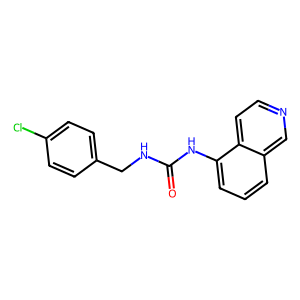

In [64]:
from rdkit import Chem
from rdkit.Chem import Draw

# Example SMILES (replace with your compound)
smiles = "O=C(NCc1ccc(Cl)cc1)Nc1cccc2cnccc12"  #

# Convert SMILES to molecule
mol = Chem.MolFromSmiles(smiles)

# Display molecule structure
Draw.MolToImage(mol)


**Calculate fingerprint descriptors
Calculate PaDEL descriptors **


In [65]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [66]:
! bash padel.sh

Processing CHEMBL102010 in molecule.smi (1/3929). 
Processing CHEMBL104623 in molecule.smi (2/3929). 
Processing CHEMBL103590 in molecule.smi (3/3929). Average speed: 8.87 s/mol.
Processing CHEMBL320906 in molecule.smi (5/3929). Average speed: 3.31 s/mol.
Processing CHEMBL102486 in molecule.smi (4/3929). Average speed: 4.65 s/mol.
Processing CHEMBL103898 in molecule.smi (6/3929). Average speed: 2.67 s/mol.
Processing CHEMBL317045 in molecule.smi (7/3929). Average speed: 2.28 s/mol.
Processing CHEMBL317011 in molecule.smi (8/3929). Average speed: 2.06 s/mol.
Processing CHEMBL106391 in molecule.smi (9/3929). Average speed: 1.88 s/mol.
Processing CHEMBL105252 in molecule.smi (10/3929). Average speed: 1.72 s/mol.
Processing CHEMBL104445 in molecule.smi (11/3929). Average speed: 1.55 s/mol.
Processing CHEMBL105694 in molecule.smi (12/3929). Average speed: 1.45 s/mol.
Processing CHEMBL104892 in molecule.smi (13/3929). Average speed: 1.35 s/mol.
Processing CHEMBL323352 in molecule.smi (15/392

In [67]:
! ls -l

total 115464
-rw-r--r-- 1 root root  7001997 Jun  1 09:17 descriptors_output.csv
drwxr-xr-x 3 root root     4096 Jun  1 08:59 __MACOSX
-rw-r--r-- 1 root root      121 Jun  1 08:58 mannwhitneyu_LogP.csv
-rw-r--r-- 1 root root      116 Jun  1 08:57 mannwhitneyu_MW.csv
-rw-r--r-- 1 root root      131 Jun  1 08:58 mannwhitneyu_NumHAcceptors.csv
-rw-r--r-- 1 root root      127 Jun  1 08:58 mannwhitneyu_NumHDonors.csv
-rw-r--r-- 1 root root       93 Jun  1 08:57 mannwhitneyu_pIC50.csv
-rwxr-xr-x 1 root root 85055499 Feb 13 19:49 Miniconda3-py37_4.8.2-Linux-x86_64.sh
-rw-r--r-- 1 root root   259308 Jun  1 08:59 molecule.smi
drwxrwxr-x 4 root root     4096 May 30  2020 PaDEL-Descriptor
-rw-r--r-- 1 root root      231 Jun  1 08:59 padel.sh
-rw-r--r-- 1 root root 25768637 Jun  1 08:59 padel.zip
-rw-r--r-- 1 root root    13240 Jun  1 08:57 plot_bioactivity_class.pdf
-rw-r--r-- 1 root root    15777 Jun  1 08:57 plot_ic50.pdf
-rw-r--r-- 1 root root    14420 Jun  1 08:58 plot_LogP.pdf
-rw-r--r-- 1 r

Preparing the X and Y Data Matrices
X data matrix

In [68]:
df_X = pd.read_csv('descriptors_output.csv')

In [69]:
df_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL102010,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL104623,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL103590,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL102486,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL320906,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3924,AUTOGEN_molecule_3924,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3925,AUTOGEN_molecule_3926,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3926,AUTOGEN_molecule_3927,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3927,AUTOGEN_molecule_3928,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
df_X = df_X.drop(columns=['Name'])
df_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3924,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3925,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3926,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3927,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


Y variable
Convert IC50 to pIC50



In [71]:
df_Y = df_2class['pIC50']
df_Y

,pIC50
0,8.221849
1,7.886057
2,8.000000
3,8.221849
4,7.494850
...,...
3924,NaN
3925,NaN
3926,NaN
3927,NaN


Combining X and Y variable


In [72]:
dataset = pd.concat([df_X,df_Y], axis=1)
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.221849
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.886057
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.000000
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.221849
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.494850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3924,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,NaN
3925,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,NaN
3926,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,NaN
3927,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,NaN


In [ ]:
#dataset3.to_csv('mGluR5_06_bioactivity_data_3class_pIC50_pubchem_fp.csv', index=False)


**Part-4:Regression Models with Random Forest**

In [73]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import VarianceThreshold

In [75]:
df=dataset

3. Input features
The Acetylcholinesterase data set contains 881 input features and 1 output variable (pIC50 values).

In [76]:
# Define features and target
X = df.drop('pIC50', axis=1)
Y = df['pIC50']

In [77]:
# Remove low variance features
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_reduced = selection.fit_transform(X)

In [78]:
# Convert reduced X back to DataFrame to keep compatibility
X_df = pd.DataFrame(X_reduced)

In [79]:
# Convert Y to Series with a name
Y_series = pd.Series(Y.values, name="pIC50")

In [80]:
# Combine X and Y for dropping NaNs
data = pd.concat([X_df, Y_series], axis=1)


In [81]:
# Drop rows with any NaNs
data_clean = data.dropna()

In [82]:
# Separate cleaned data
X_clean = data_clean.drop(columns=["pIC50"])
Y_clean = data_clean["pIC50"]

In [83]:
# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X_clean, Y_clean, test_size=0.2)


In [84]:
# Train the model
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)

RandomForestRegressor()

In [85]:
# Evaluate the model
r = model.score(X_test, Y_test)
print("R² score:", r)

R² score: 0.5677687129919017


In [86]:
r = model.score(X_test, Y_test)
r

0.5677687129919017

In [87]:
Y_pred = model.predict(X_test)

6. Scatter Plot of Experimental vs Predicted pIC50 Values


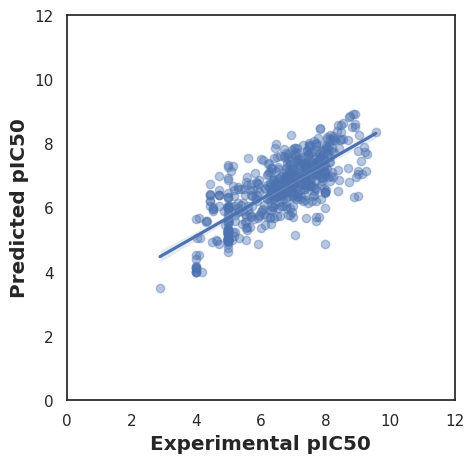

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

# Ensure Y_test and Y_pred are aligned Series/arrays
ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha': 0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show()


**Part-5:Comparing Regressors**

In [89]:
dataset.head()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.221849
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.886057
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.000000
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.221849
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.494850


In [90]:
import sys
print(sys.version)


3.11.12 (main, Apr  9 2025, 08:55:54) [GCC 11.4.0]


In [91]:
# Step 1: Upgrade pip and wheel to avoid build issues
!pip install --upgrade pip setuptools wheel

# Step 2: Install xgboost
!pip install xgboost

# Step 3: Install a stable version of lightgbm
!pip install lightgbm==3.3.5  # Works reliably on Colab

# Step 4: Finally install LazyPredict without dependency conflicts
!pip install lazypredict --no-deps


     |████████████████████████████████| 2.1 MB 7.5 MB/s 
     |████████████████████████████████| 804 kB 42.7 MB/s 
     |████████████████████████████████| 65 kB 4.0 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 20.0.2
    Uninstalling pip-20.0.2:
      Successfully uninstalled pip-20.0.2
  Attempting uninstall: setuptools
    Found existing installation: setuptools 45.2.0.post20200210
    Uninstalling setuptools-45.2.0.post20200210:
      Successfully uninstalled setuptools-45.2.0.post20200210
  Attempting uninstall: wheel
    Found existing installation: wheel 0.34.2
    Uninstalling wheel-0.34.2:
      Successfully uninstalled wheel-0.34.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.1/38.1 MB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.8/24.8 MB 63.3 MB/s eta 0:00:00
   ━━━━━━━

In [92]:
import lazypredict
print(lazypredict.__file__)


/usr/local/lib/python3.7/site-packages/lazypredict/__init__.py


In [93]:
file_path = "/usr/local/lib/python3.7/site-packages/lazypredict/Supervised.py"

with open(file_path, "r") as f:
    content = f.read()

content = content.replace("sparse=False", "sparse_output=False")

with open(file_path, "w") as f:
    f.write(content)

print("Patch applied successfully.")



Patch applied successfully.


In [94]:
from lazypredict.Supervised import LazyClassifier


In [96]:
import lazypredict
from lazypredict.Supervised import LazyRegressor
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

 98%|█████████▊| 41/42 [00:37<00:00,  1.87it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002032 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 456
[LightGBM] [Info] Number of data points in the train set: 2276, number of used features: 152
[LightGBM] [Info] Start training from score 6.585560


100%|██████████| 42/42 [00:38<00:00,  1.10it/s]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 42/42 [00:34<00:00,  1.20it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002054 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 456
[LightGBM] [Info] Number of data points in the train set: 2276, number of used features: 152
[LightGBM] [Info] Start training from score 6.585560


In [97]:
# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreeRegressor,0.92,0.93,0.32,0.10
DecisionTreeRegressor,0.92,0.93,0.32,0.12
ExtraTreesRegressor,0.92,0.93,0.32,4.91
GaussianProcessRegressor,0.92,0.93,0.32,4.25
XGBRegressor,0.88,0.89,0.38,0.30
RandomForestRegressor,0.87,0.88,0.41,3.59
BaggingRegressor,0.85,0.86,0.44,0.44
MLPRegressor,0.82,0.83,0.48,7.33
HistGradientBoostingRegressor,0.72,0.74,0.60,1.13


In [98]:
# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RandomForestRegressor,0.41,0.56,0.82,3.58
HistGradientBoostingRegressor,0.40,0.56,0.82,1.18
BaggingRegressor,0.38,0.55,0.84,0.40
XGBRegressor,0.38,0.54,0.84,0.30
SVR,0.36,0.53,0.85,0.71
NuSVR,0.36,0.53,0.85,0.66
LGBMRegressor,0.36,0.53,0.86,0.26
MLPRegressor,0.34,0.51,0.87,7.35
GradientBoostingRegressor,0.33,0.51,0.87,1.16


5. Data visualization of model performance

[(0.0, 1.0)]

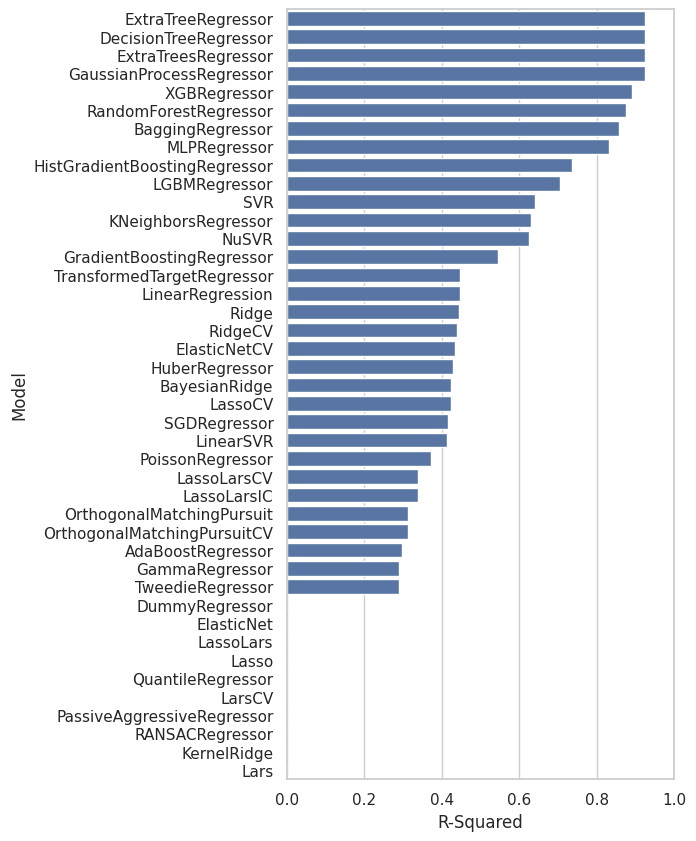

In [99]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

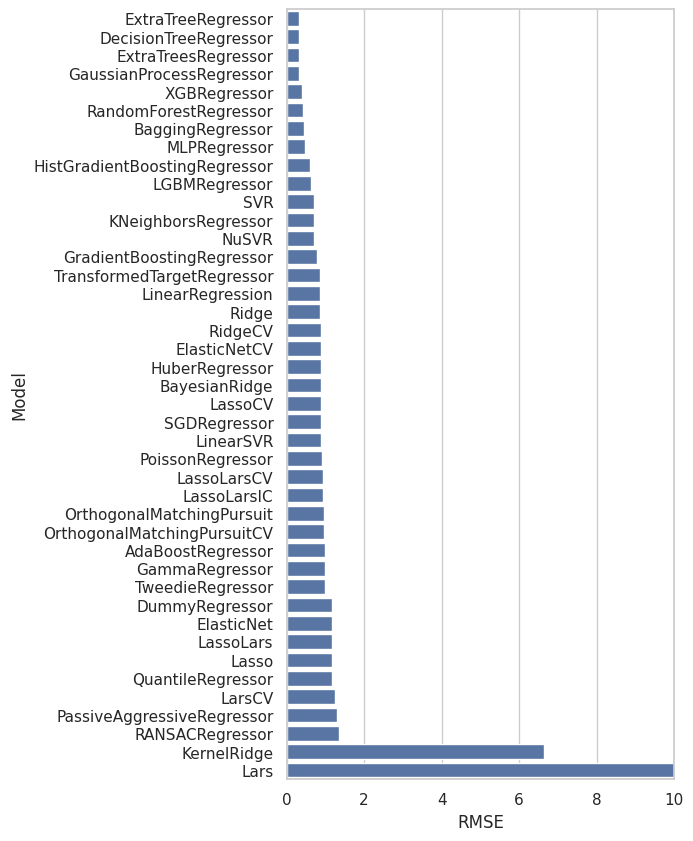

In [100]:
 #Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

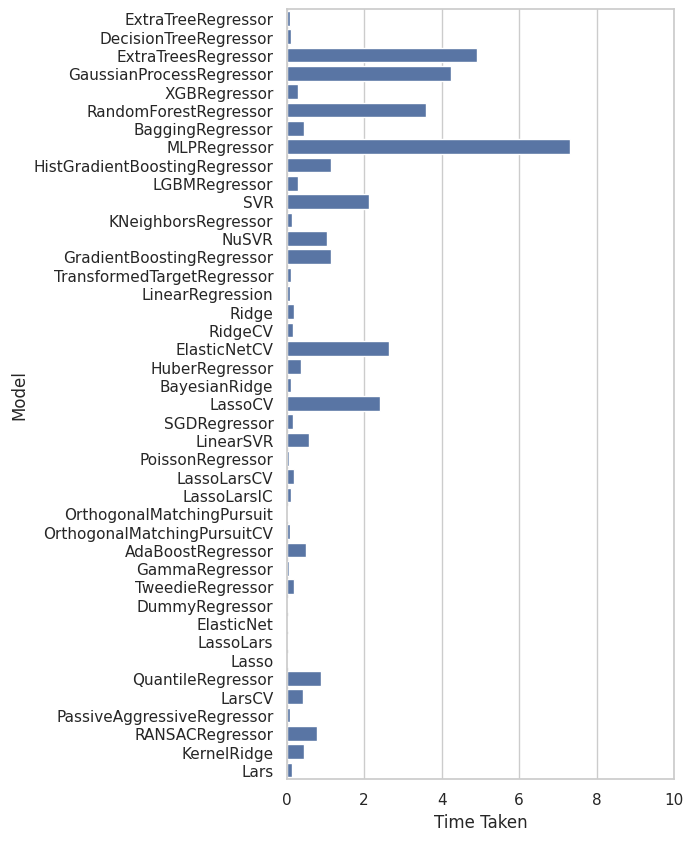

In [101]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))

In [102]:
#Done